<a href="https://colab.research.google.com/github/danielfrgs/2022_1-Reconocimiento-Patrones/blob/main/Examenes/E1/E1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Examen 1

Fragoso Alavardo Daniel

-----

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%config InlineBackend.figure_format = 'retina'

import cv2

5. A partir de la siguiente lista de puntos identifique el outlier.

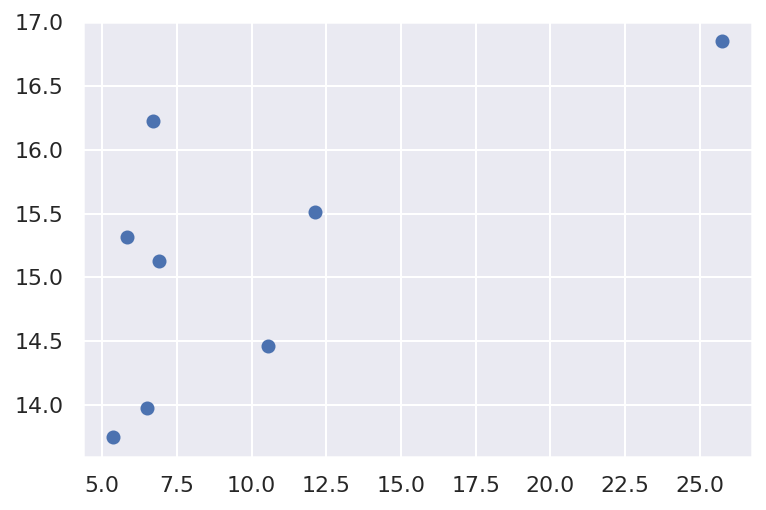

In [14]:
puntos = np.array([[6.7,16.23], 
                   [5.84,15.32],
                   [25.74,16.85],
                   [6.89,15.13],
                   [5.36,13.75],
                   [6.51,13.98],
                   [10.56,14.46],
                   [12.14,15.51]])

plt.scatter(puntos[:, 0], puntos[:, 1])
plt.savefig('5.png')

Con k medias:

In [15]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters = 2)

# AJUSTAMOS
km = km.fit(puntos)
y_hat = km.predict(puntos)
C = km.cluster_centers_

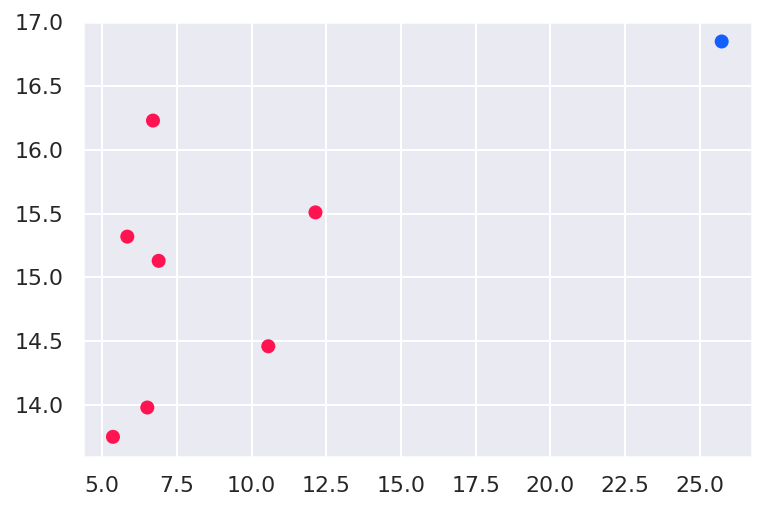

In [16]:
# Visualicemmos los la clasificación por clases

import matplotlib
fig, ax = plt.subplots()

colors = ['#FF1451', '#145FFF']
ax.scatter(puntos[:,0], puntos[:,1], c = y_hat, cmap=matplotlib.colors.ListedColormap(colors))
plt.savefig('5_a.png')


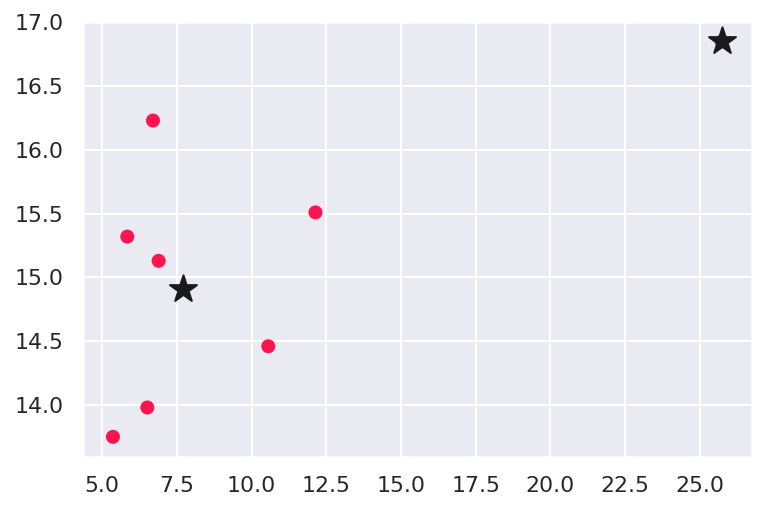

In [17]:
# Visualicemos los clusters
import matplotlib
fig, ax = plt.subplots()

colors = ['#FF1451', '#145FFF']
ax.scatter(puntos[:,0], puntos[:,1], c = y_hat, cmap=matplotlib.colors.ListedColormap(colors))
ax.scatter(C[:,0], C[:,1], marker = '*', s = 200, c = 'k')
plt.savefig('5_b.png')

----

12. ¿Qué función de Python utilizaría para distinguir el área del objeto de la siguiente
figura?

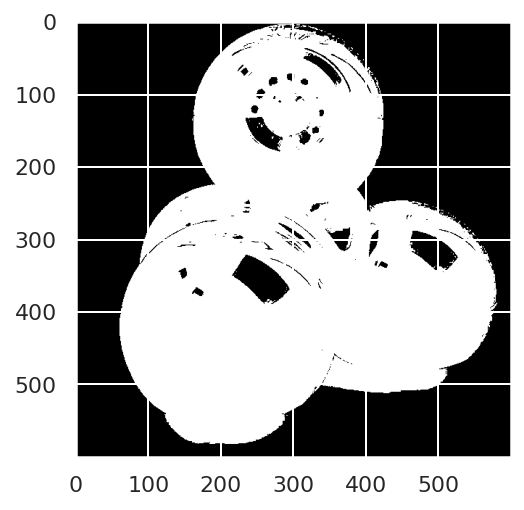

In [18]:
# Carguemos la imagen
image = cv2.imread("E12.jpg")

# A escala de grises
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Creamos una immagen binaria. apartir del contorno
_, binary = cv2.threshold(gray, 225, 255, cv2.THRESH_BINARY_INV)

plt.imshow(binary, cmap="gray")
plt.savefig('12_1.png')
plt.show()


In [19]:
# Otra opción:

# Librerias

import glob
import skimage.io
import skimage.color
import skimage.filters

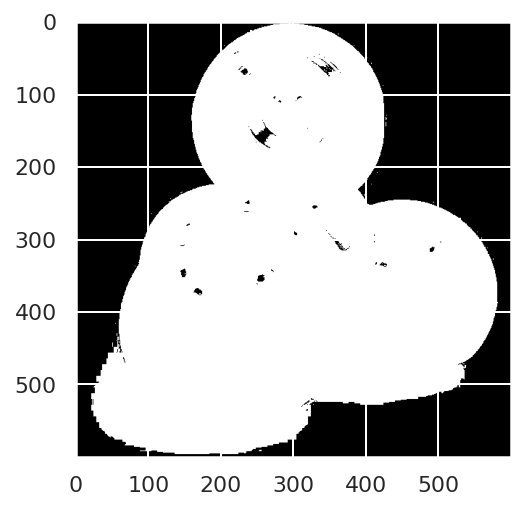

In [20]:
# Cargamos la imagen
image = skimage.io.imread("E12.jpg")

# Convertimos a escala de grises:
gray_image = skimage.color.rgb2gray(image)

# Filtramos para crear una imagen binaria
t = 0.98
binary_mask = gray_image < t

fig, ax = plt.subplots()
plt.imshow(binary_mask, cmap='gray')
plt.savefig('12_2.png')
plt.show()


---

14. ¿Para qué sirve el convexHull y describa un ejemplo en Python?

In [21]:
from scipy.spatial import ConvexHull
points = np.random.rand(30, 2)   # 30 random points in 2-D
hull = ConvexHull(points)

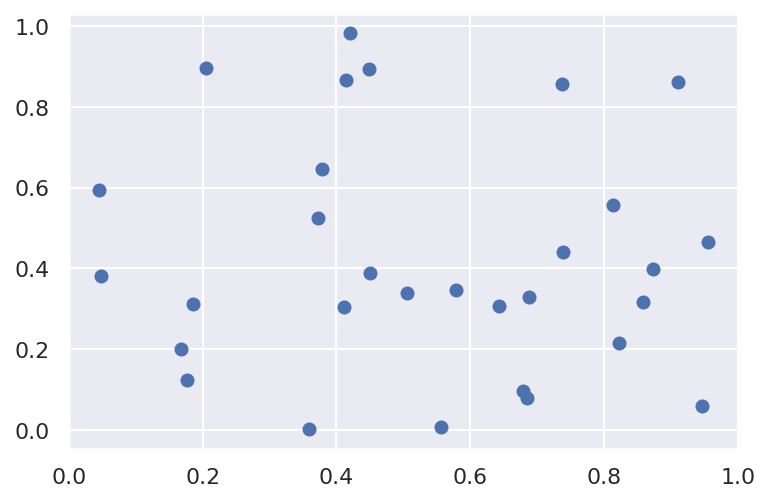

In [22]:
plt.plot(points[:,0], points[:,1], 'o')
plt.savefig('14_1.png')

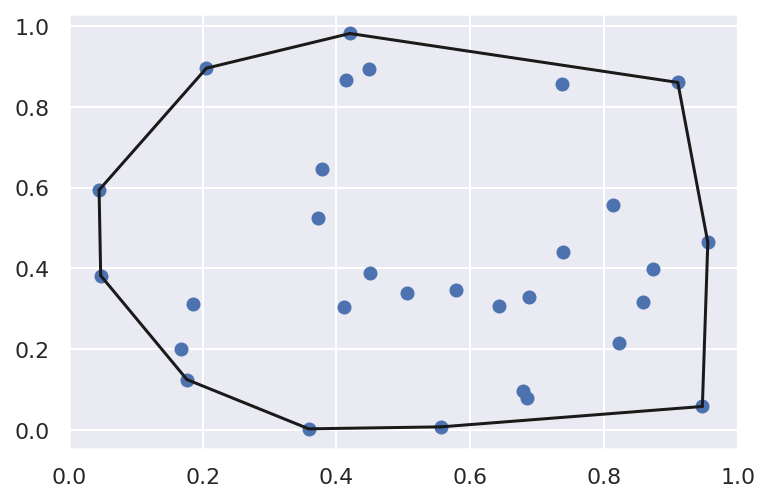

In [23]:
plt.plot(points[:,0], points[:,1], 'o')
for simplex in hull.simplices:
     plt.plot(points[simplex,0], points[simplex,1], 'k-')
plt.savefig('14_2.png')

## Sección 2

1. Proporcione un conjunto de datos en el que en el que el kNN nos de mejores resultados que el clasificador NN.
Grafique los resultados en Python.

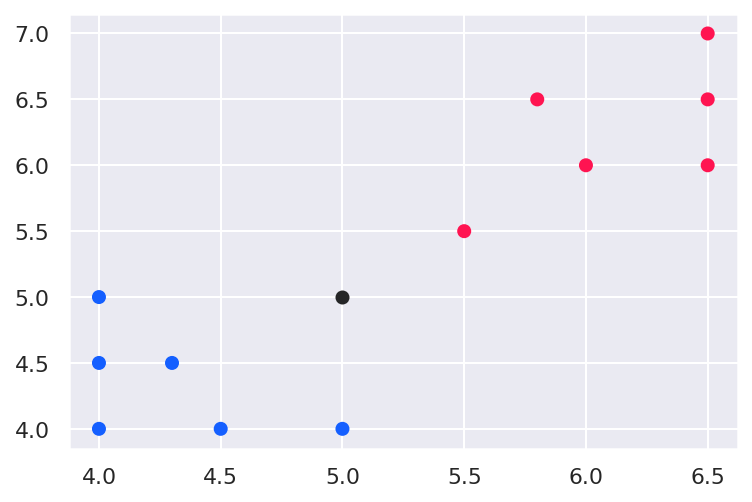

In [24]:
puntos = np.array([[5.5,5.5,1],
                   [5.8, 6.5,1],
                   [6.5, 6,1],
                   [6, 6,1],
                   [6.5, 6.5,1],
                   [6.5, 7,1],
                   [4, 5,2],
                   [5,4,2],
                   [4.3,4.5,2],
                   [4,4,2],
                   [4.5,4,2],
                   [4,4.5,2]])

plt.scatter(5, 5, c = '#252627')

import matplotlib
colors = ['#FF1451', '#145FFF']
plt.scatter(puntos[:, 0], puntos[:, 1], c = puntos[:, 2], cmap=matplotlib.colors.ListedColormap(colors))
plt.savefig('2_1_a.png')

Vamos a toar nuestra implemnetación de clase para desarrollar este ejercicio:

In [25]:
import numpy as np
from collections import Counter
from scipy.spatial import distance

def Kvecinos(X, y, k, Patrones):
    '''
    Kvecinos:
      Función que clasifica puntos de un conjunto de datos a partir de KNN con la 
      distancia euclidea

    Parámetros
    ----------
    X:  Lista
      Conjunto de patreones clasificados
    y:  Lista 
      Conjunto de etiquetas de clase
    k:  Número entero 
      Número de Vecinos
    Patrones: Lista
      Conjunto de patrones que vamos a clasificar
    '''
    # Generamos lista vacia para establcer las clasificaciones
    predict = []

    # Tratamos de clasificar
    for patron in Patrones:
        # Lista para almacena distancias
        distances = []
        for x in X:
            distances.append(distance.euclidean(x, patron))
        # Selección del número de indices que nos interesan
        k_indice = np.argsort(distances)[:k] # Esto nos da el índice de las primeras k distancias. 
        # Obtenemos de y_train la etiqueta
        k_label = [y[i] for i in k_indice]
        # Ahora para clasificarlo vamos a buscar la etiqueta que más se repite
        # por medio de la función counter. y el atributo moss_common que da una lista 
        # de tuplas que en primer lugar tienen el elemnto de mayor repetición entonces 
        predict.append(Counter(k_label).most_common(1)[0][0])
    return predict

k = 1

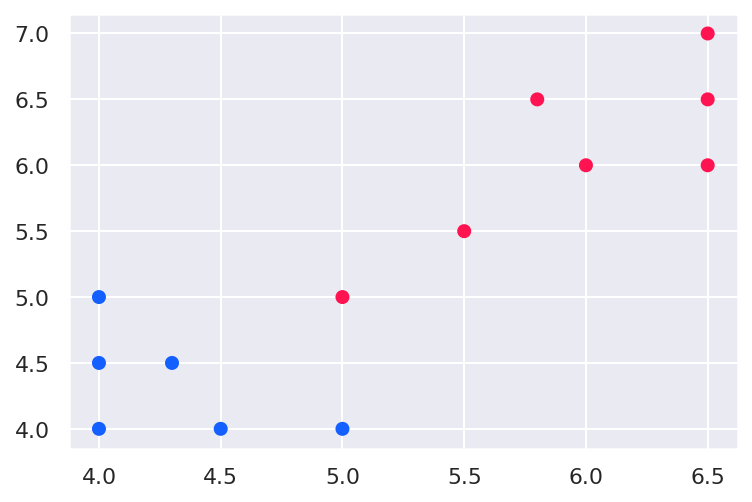

In [26]:
c = puntos[:, [0, 1]].tolist()
c2 = puntos[:, 2].tolist()

# Definimos el punto a clasificar:

patron = [[5, 5]]

k = Kvecinos(c, c2, 1, patron)
c_g = np.array(c + patron)
c2_g = c2 + k

plt.scatter(c_g[:, 0], c_g[:, 1], c = c2_g, cmap=matplotlib.colors.ListedColormap(colors))
plt.savefig('2_1_b_1.png')

In [27]:
k

[1.0]

K = 2

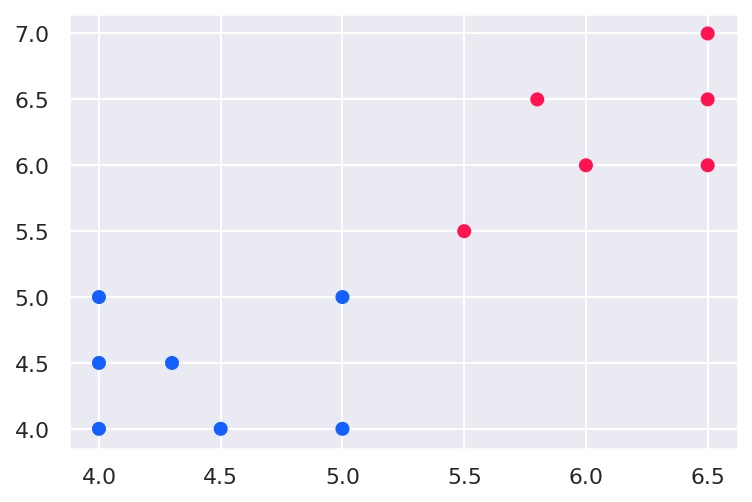

In [28]:
c = puntos[:, [0, 1]].tolist()
c2 = puntos[:, 2].tolist()

# Definimos el punto a clasificar:

patron = [[5, 5]]

k = Kvecinos(c, c2, 3, patron)
c_g = np.array(c + patron)
c2_g = c2 + k

plt.scatter(c_g[:, 0], c_g[:, 1], c = c2_g, cmap=matplotlib.colors.ListedColormap(colors))
plt.savefig('2_1_b_2.png')

In [29]:
k

[2.0]

k = 3

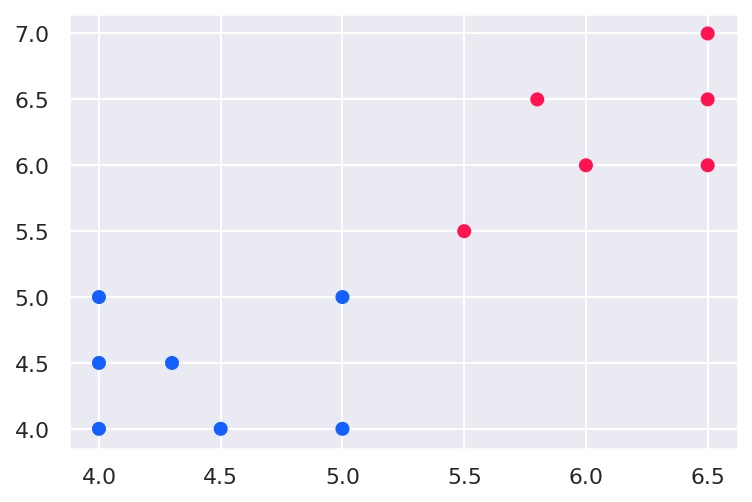

In [30]:
c = puntos[:, [0, 1]].tolist()
c2 = puntos[:, 2].tolist()

# Definimos el punto a clasificar:

patron = [[5, 5]]

k = Kvecinos(c, c2, 5, patron)
c_g = np.array(c + patron)
c2_g = c2 + k

plt.scatter(c_g[:, 0], c_g[:, 1], c = c2_g, cmap=matplotlib.colors.ListedColormap(colors))
plt.savefig('2_1_b_3.png')

In [31]:
k

[2.0]

----
2. Considere el conjunto bidimensional de los siguientes patrones.

In [32]:
puntos = np.array([[1,1,1],
                  [1,2,1],
                  [1,3,1],
                  [2,1,1],
                  [2,2,1],
                  [2,3,1],
                  [2,3.5,1],
                  [2.5,2,1],
                  [3.5,1,1],
                  [3.5,2,1],
                  [3.5,3,2],
                  [3.5,4,2],
                  [4.5,1,2],
                  [4.5,2,2],
                  [4.5,3,2],
                  [5,4,2],
                  [5,5,2],
                  [6,3,2],
                  [6,4,2],
                  [6,5,2]])

En el vector, el primer elemento es la característica 1 y el segundo elemento es la característica 2 y el tercer elemento es la clase.

a) Grafique los puntos.

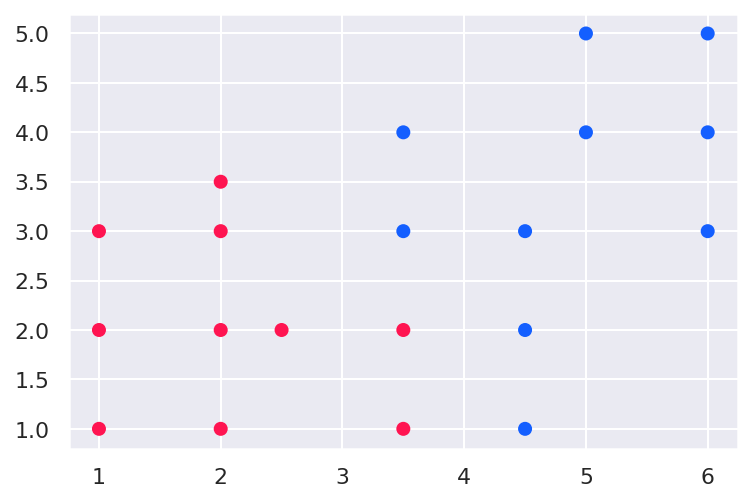

In [33]:
import matplotlib
colors = ['#FF1451', '#145FFF']
plt.scatter(puntos[:, 0], puntos[:, 1], c = puntos[:, 2], cmap=matplotlib.colors.ListedColormap(colors))
plt.savefig('2_2_a.png')

b) Si el patrón de prueba P es (3.8,3.1) encuentre la clase a la que pertenece P usando el algoritmo NN

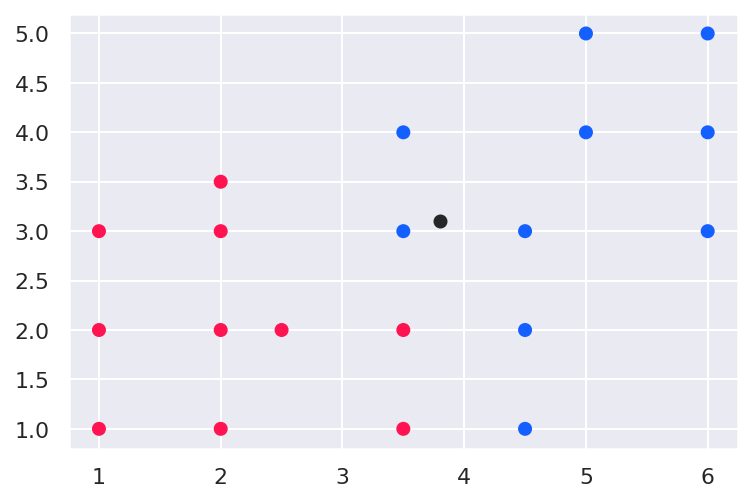

In [34]:
import matplotlib
colors = ['#FF1451', '#145FFF']
plt.scatter(puntos[:, 0], puntos[:, 1], c = puntos[:, 2], cmap=matplotlib.colors.ListedColormap(colors))
plt.scatter(3.8, 3.1, c = '#252627')
plt.savefig('2_2_b_1.png')

k=1

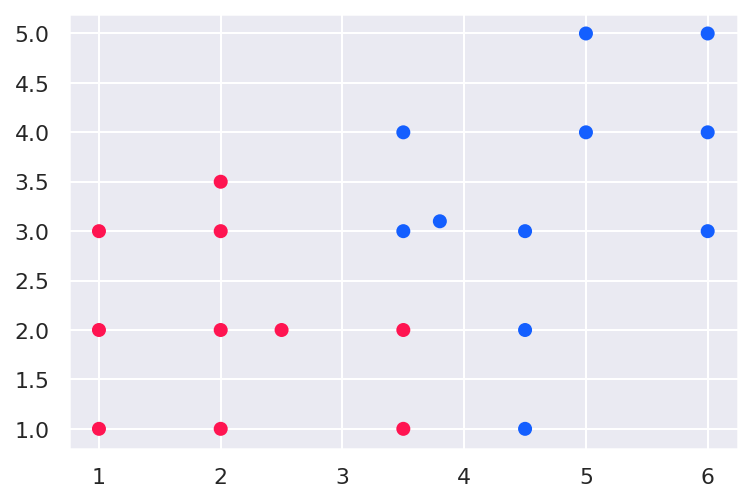

In [35]:
c = puntos[:, [0, 1]].tolist()
c2 = puntos[:, 2].tolist()

# Definimos el punto a clasificar:

patron = [[3.8, 3.1]]

k = Kvecinos(c, c2, 1, patron)
c_g = np.array(c + patron)
c2_g = c2 + k

plt.scatter(c_g[:, 0], c_g[:, 1], c = c2_g, cmap=matplotlib.colors.ListedColormap(colors))
plt.savefig('2_2_b_2.png')

In [36]:
# Clase:
k

[2.0]

k = 3

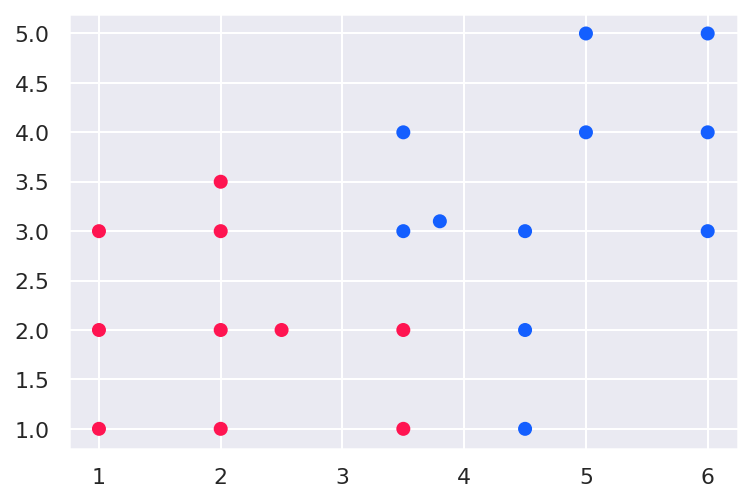

In [37]:
c = puntos[:, [0, 1]].tolist()
c2 = puntos[:, 2].tolist()

# Definimos el punto a clasificar:

patron = [[3.8, 3.1]]

k = Kvecinos(c, c2, 3, patron)
c_g = np.array(c + patron)
c2_g = c2 + k

plt.scatter(c_g[:, 0], c_g[:, 1], c = c2_g, cmap=matplotlib.colors.ListedColormap(colors))
plt.savefig('2_2_b_3.png')